# Reducing hospital readmissions

## 📖 Background
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

## <ol type='I' start=1><li>Itroduction</li></ol>
<a href="#load">loading</a>

## <ol type='I' start=2><li>Data Exploration</li></ol>

#### <ol type='1' start=1><li>Import Packages</li></ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# set display options for pandas
display = pd.options.display
display.max_columns = None

# ignore warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### <ol type='1' start=2><li id="load">Load Data</li></ol>

In [2]:
# read in the data
df = pd.read_csv('data/hospital_readmissions.csv')

# take a look at the data
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
# Make a copy of the data
data = df.copy()
data.shape

(25000, 17)

#### <ol type='1' start=3><li id="explore_data">Explore Data</li></ol>

In [4]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64


let's check for unique values in each column

In [5]:
# Unique values in each column
print("number of unique values in each column:")
print(data.nunique())

number of unique values in each column:
age                    6
time_in_hospital      14
n_lab_procedures     109
n_procedures           7
n_medications         70
n_outpatient          23
n_inpatient           16
n_emergency           21
medical_specialty      7
diag_1                 8
diag_2                 8
diag_3                 8
glucose_test           3
A1Ctest                3
change                 2
diabetes_med           2
readmitted             2
dtype: int64


In [6]:
# describe numeric data
data.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


<p>
    No missing values in the Numeric variables:
</p>
<ul>
    <li><a href="time_in_hospital">time_in_hospital</a></li>
    <li><a href="n_procedures">n_procedures</a></li>
    <li><a href="n_lab_procedures">n_lab_procedures</a></li>
    <li><a href="n_medications">n_medications</a></li>
    <li><a href="n_outpatient">n_outpatient</a></li>
    <li><a href="n_inpatient">n_inpatient</a></li>
    <li><a href="n_emergency">n_emergency</a></li>

</ul>

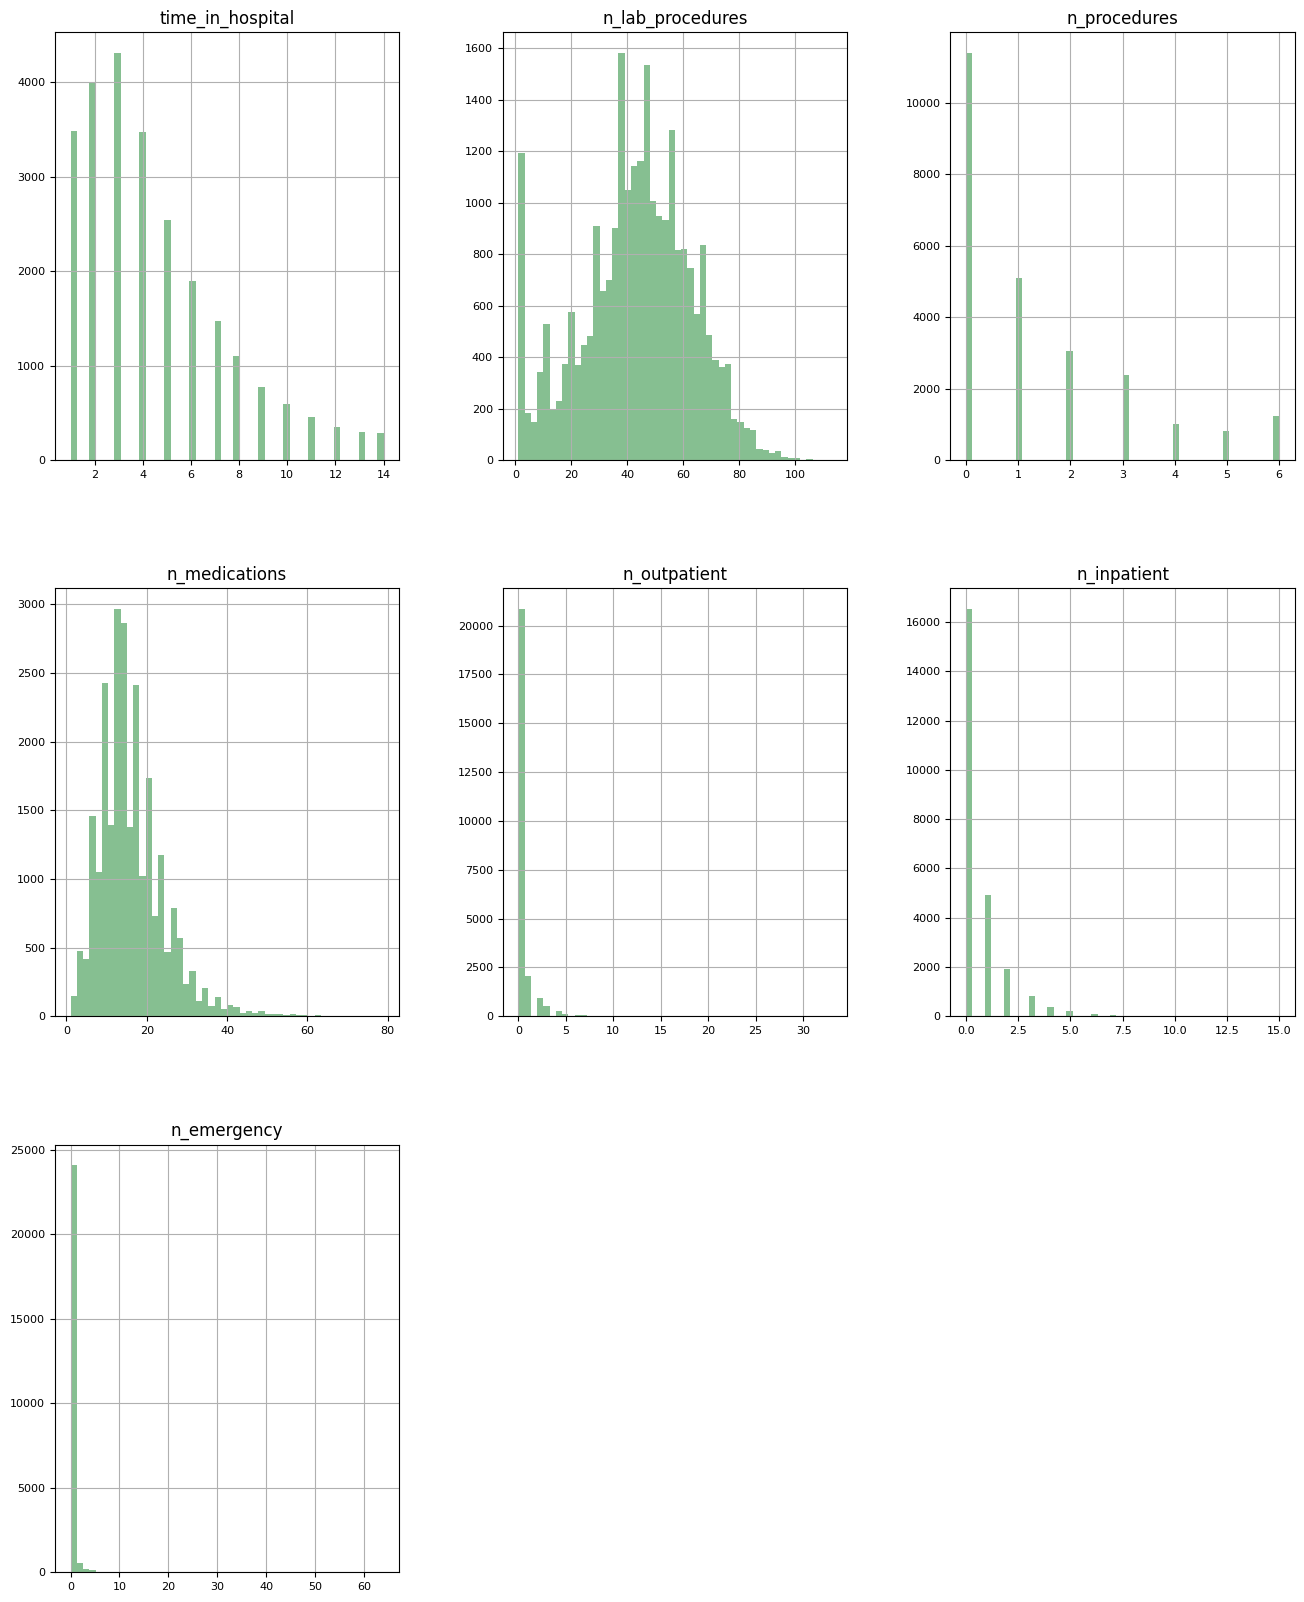

In [7]:
# plot the distribution of all numeric columns
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='#86bf91');

plt.show()

In [8]:
# describe categorical data
data.describe(include=['O'])

,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,6,7,8,8,8,3,3,2,2,2
top,[70-80),Missing,Circulatory,Other,Other,no,no,no,yes,no
freq,6837,12382,7824,9056,9107,23625,20938,13497,19228,13246


In [9]:
#explore the medical specialty variable
data['medical_specialty'].value_counts(normalize=True)

Missing                   0.49528
InternalMedicine          0.14260
Other                     0.10656
Emergency/Trauma          0.07540
Family/GeneralPractice    0.07528
Cardiology                0.05636
Surgery                   0.04852
Name: medical_specialty, dtype: float64

<p> 
    50% of  medical_speciality variable are <span style="text-decoration: underline;">missing.</span>
</p>

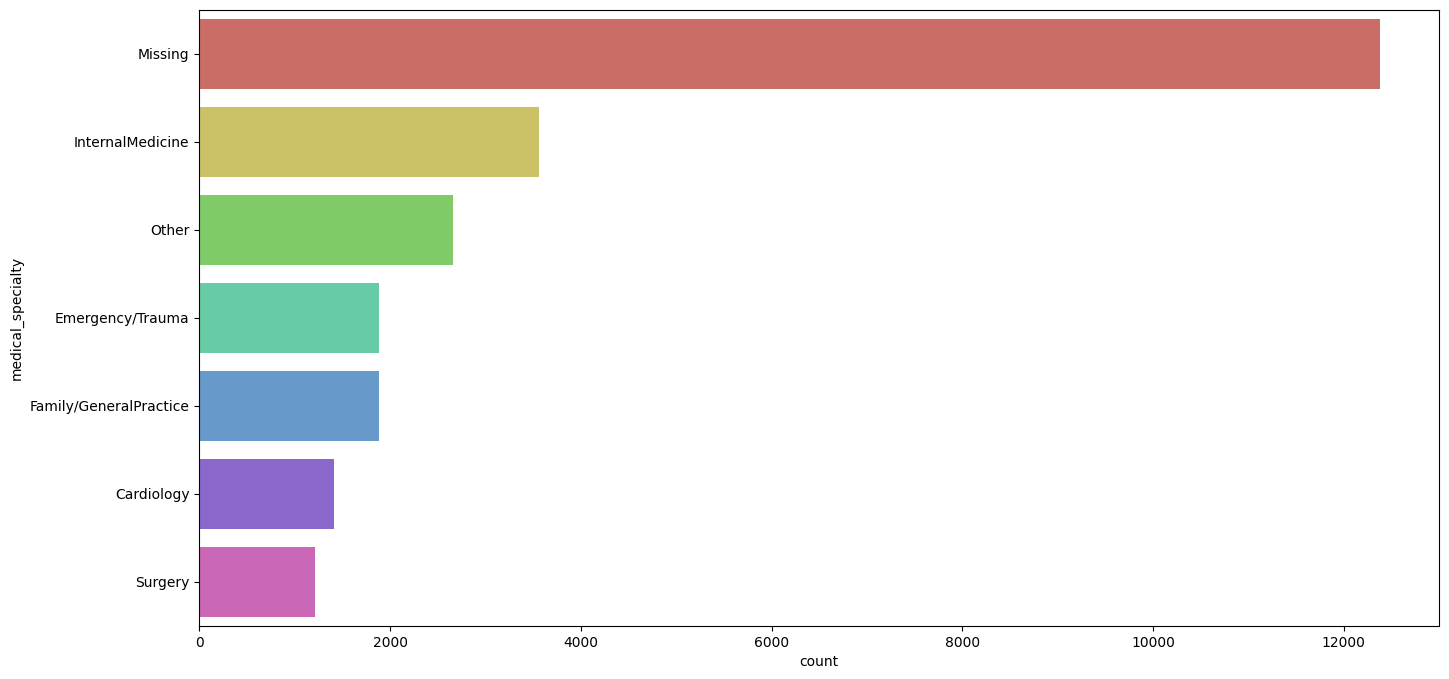

In [10]:
# plot the distribution of the medical specialty variable
plt.figure(figsize=(16, 8))
sns.countplot(y='medical_specialty', data=data, order=data['medical_specialty'].value_counts().index, palette='hls')
plt.show()

In [11]:
# explore glucose_test column
data['glucose_test'].value_counts(normalize=True)

no        0.94500
normal    0.02756
high      0.02744
Name: glucose_test, dtype: float64

<p>
    No missing values in the <a href="glucose_test"> glucose_test</a> column.
</p>

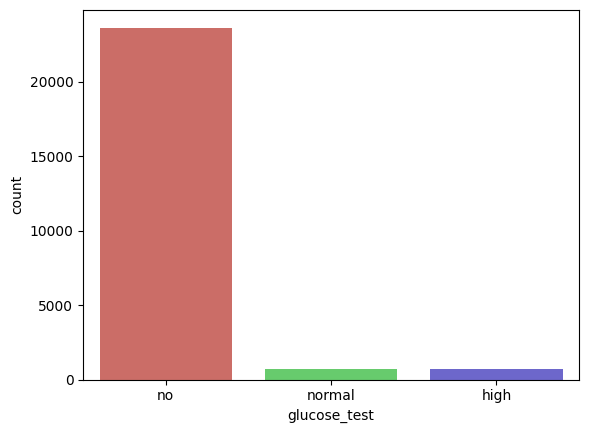

In [12]:
# plot the glucose_test column
sns.countplot(x='glucose_test', data=data, palette='hls')
plt.show()

In [13]:
# explore the age column
data['age'].value_counts(normalize=True)

[70-80)     0.27348
[60-70)     0.23652
[80-90)     0.18064
[50-60)     0.17808
[40-50)     0.10128
[90-100)    0.03000
Name: age, dtype: float64

<p> No Missing values in the <a href="#age">age</a> column.</p>

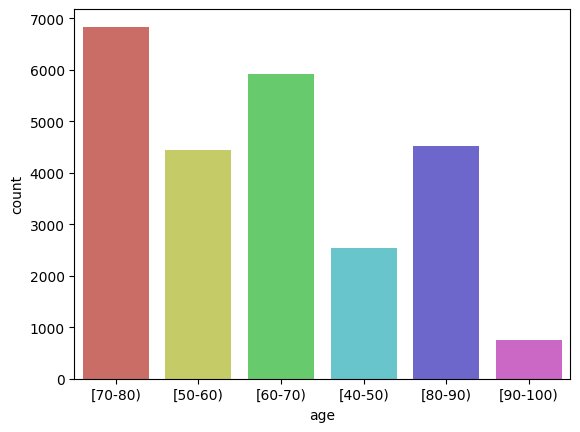

In [14]:
# plot the age column
sns.countplot(x='age', data=data, palette='hls')
plt.show()

In [15]:
# ecplore diag_1 column
data['diag_1'].value_counts(normalize=False)

Circulatory        7824
Other              6498
Respiratory        3680
Digestive          2329
Diabetes           1747
Injury             1666
Musculoskeletal    1252
Missing               4
Name: diag_1, dtype: int64

<p> 
    4 missing values in <a href="#diag1">diag_1</a> column
</p>

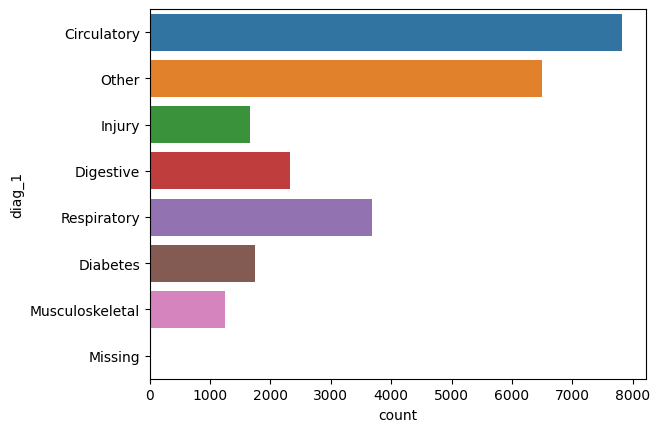

In [16]:
# plot the diag_1 column
sns.countplot(y='diag_1', data=data)
plt.show()

In [17]:
# Explore diag_2 column
data['diag_2'].value_counts(normalize=False)

Other              9056
Circulatory        8134
Diabetes           2906
Respiratory        2872
Digestive           973
Injury              591
Musculoskeletal     426
Missing              42
Name: diag_2, dtype: int64

<p> 
    42 missing values in <a href="#diag2">diag_2</a> column
</p>

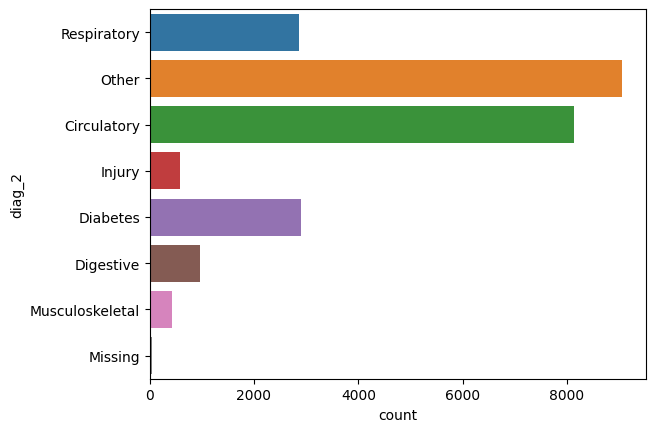

In [18]:
# plot the diag_2 column
sns.countplot(y='diag_2', data=data)
plt.show()

<AxesSubplot: xlabel='count', ylabel='diag_2'>

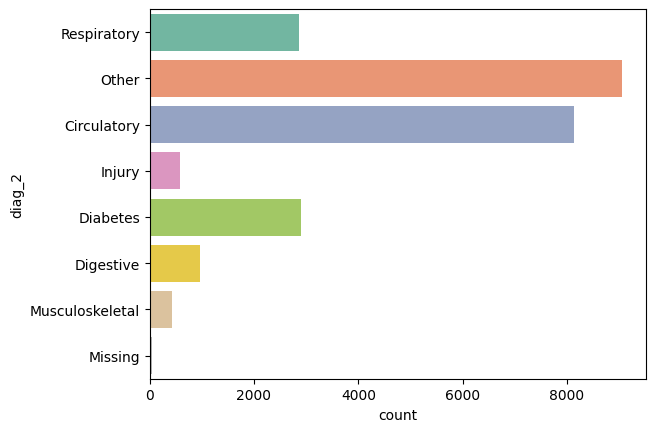

In [19]:
# plot the diag_2 column
sns.countplot(y='diag_2', data=data, palette='Set2')

In [20]:
# Explore diag_3 column
data['diag_3'].value_counts(normalize=False)

Other              9107
Circulatory        7686
Diabetes           4261
Respiratory        1915
Digestive           916
Injury              464
Musculoskeletal     455
Missing             196
Name: diag_3, dtype: int64

<p> 
    196 missing values in <a href="#diag3">diag_3</a> column
</p>

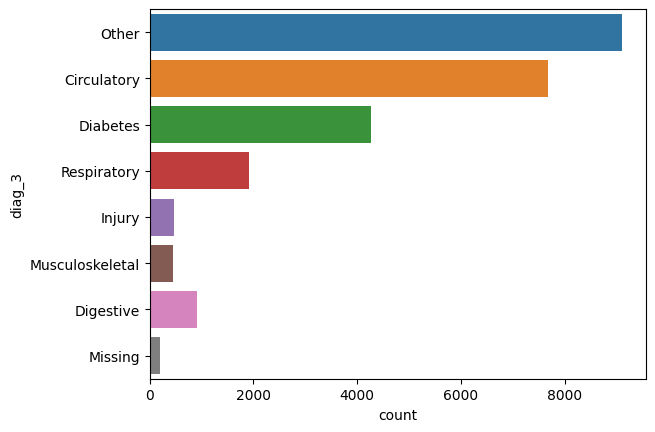

In [21]:
# plot the diag_3 column
sns.countplot(y='diag_3', data=data)
plt.show()


In [22]:
# Explore the A1Ctest column
data['A1Ctest'].value_counts(normalize=True)

no        0.83752
high      0.11308
normal    0.04940
Name: A1Ctest, dtype: float64

<p>
    No missing values in the <a href="#A1Ctest">A1Ctest</a> column.
</p>

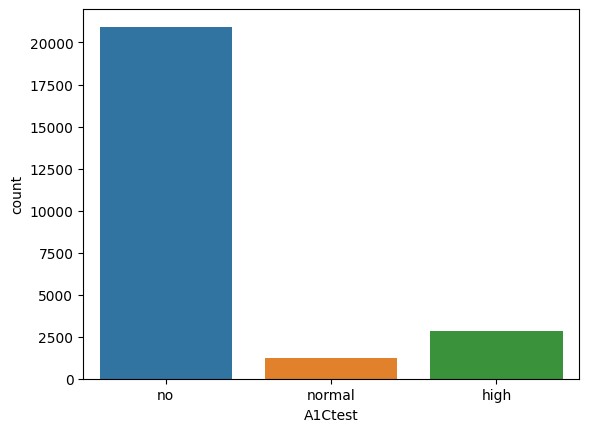

In [23]:
# plot the A1Ctest column
sns.countplot(x='A1Ctest', data=data)
plt.show()

<p>
    No missing values in the <a href="#change">change</a> column.
<p>

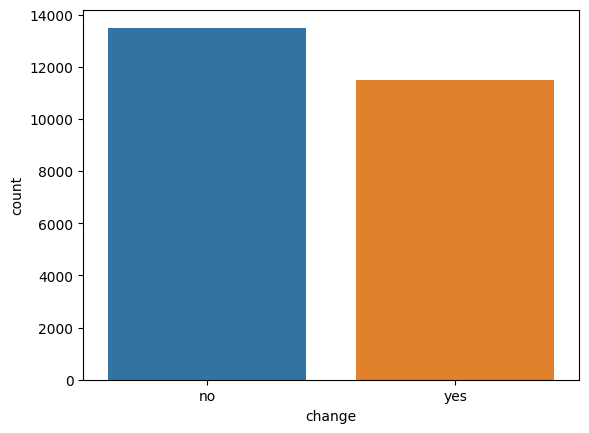

In [24]:
# plot the change column
sns.countplot(x='change', data=data)
plt.show()

In [25]:
# Explore the diabetes_med column
data['diabetes_med'].value_counts(normalize=True)

yes    0.76912
no     0.23088
Name: diabetes_med, dtype: float64

<p>
    No missing values in the <a href="#diabetes_med">diabetes_med</a> column.
</p>

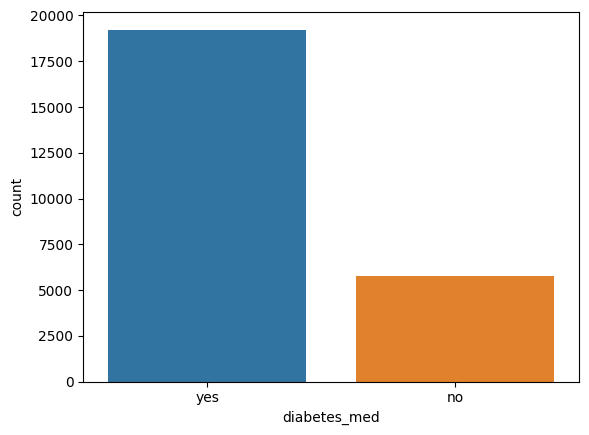

In [26]:
# plot the diabetes_med column
sns.countplot(x='diabetes_med', data=data)
plt.show()

In [27]:
# Explore the readmitted column
data['readmitted'].value_counts(normalize=True)

no     0.52984
yes    0.47016
Name: readmitted, dtype: float64

<p>
    No missing values in the <a href="#readmitted">readmitted</a> column.
</p>

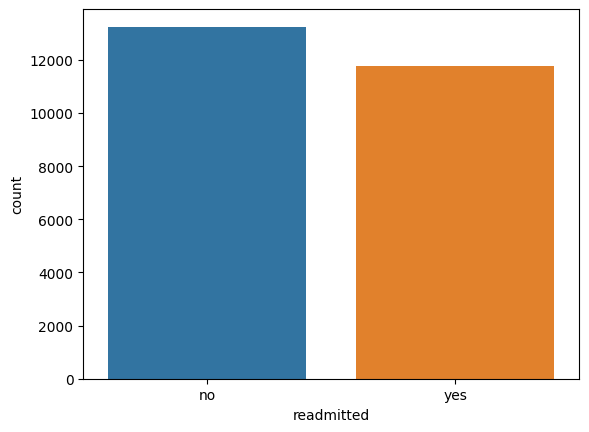

In [28]:
# plot the readmitted column
sns.countplot(x='readmitted', data=data)
plt.show()

<p>
    In conclusion, we have 50% of missing values in the <a href="#medical_specialty">medical_specialty</a> column, and 4, 42 and 196 missing values in the <a href="#diag_1">diag_1</a>, <a href="#diag_2">diag_2</a> and <a href="#diag_3">diag_3</a> columns respectively.
</p>
<p>
    In the next section, we will deal with the missing values. we'll start with the <a href="#diag_2">diag_2</a> variable. Then we'll deal with the <a href="#diag_3">diag_3</a> variable. Finally, we'll deal with the <a href="#medical_specialty">medical_specialty</a> variable.
</p>

## <ol type='I' start=3><li>Data Preparation</li></ol>
### <ol type='1' start=1><li>Data Cleaning</li></ol>

In [29]:
# make a copy of the data
clean_data = data.copy()

# get variables with missing values
diag_1 = clean_data['diag_1']
diag_2 = clean_data['diag_2']
diag_3 = clean_data['diag_3']
medical_specialty = clean_data['medical_specialty']

# drop temporarlly the variables with missing values
clean_data.drop(['diag_1', 'diag_2', 'diag_3', 'medical_specialty'], axis=1, inplace=True)


#### <ol type="A" start=1><li>Dealing with the <a href="3">diag_1</a> variable.</li></ol>

In [30]:
# replace "Missing" values with NaN
diag_1 = diag_1.replace('Missing', np.nan)


# fill NaN values with the mode
diag_1 = diag_1.fillna(diag_1.mode()[0])

# print unique values 
print(diag_1.unique())

['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal']


#### <ol type="A" start=2><li>Dealing with the <a href="diag_2">diag_2</a> variable.</li></ol>

In [31]:
# replace "Missing" values with NaN
diag_2 = diag_2.replace('Missing', np.nan)

# fill NaN values with the mode
diag_2 = diag_2.fillna(diag_2.mode()[0])

# print unique values
print(diag_2.unique())

['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal']


#### <ol type="A" start=3><li>Dealing with the <a href="diag_3">diag_3</a> variable.</li></ol>

In [32]:
# replace "Missing" values with NaN
diag_3 = diag_3.replace('Missing', np.nan)

# fill NaN values with the mode
diag_3 = diag_3.fillna(diag_3.mode()[0])

# print unique values
print(diag_3.unique())

['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive']


#### <ol type="A" start=4><li>Dealing with the <a href="#medical_specialty">medical_specialty</a> variable.</li></ol>

In [33]:
# drop missing rows in the medical_specialty column

# replace "Missing" values with NaN
medical_specialty = medical_specialty.replace('Missing', np.nan)

# concatenate the columns
clean_data = pd.concat([clean_data, diag_1, diag_2, diag_3], axis=1)

# drop missing rows in the medical_specialty column
# clean_data = clean_data.dropna(subset=['medical_specialty'], axis=0)

In [34]:
clean_data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,glucose_test,A1Ctest,change,diabetes_med,readmitted,diag_1,diag_2,diag_3
0,[70-80),8,72,1,18,2,0,0,no,no,no,yes,no,Circulatory,Respiratory,Other
1,[70-80),3,34,2,13,0,0,0,no,no,no,yes,no,Other,Other,Other
2,[50-60),5,45,0,18,0,0,0,no,no,yes,yes,yes,Circulatory,Circulatory,Circulatory
3,[70-80),2,36,0,12,1,0,0,no,no,yes,yes,yes,Circulatory,Other,Diabetes
4,[60-70),1,42,0,7,0,0,0,no,no,no,yes,no,Other,Circulatory,Respiratory


## <ol type='I' start=4><li>Data Aanalysis</li></ol>
### <ol type='1' start=1><li>What is the most common primary diagnosis by age group? </li></ol>


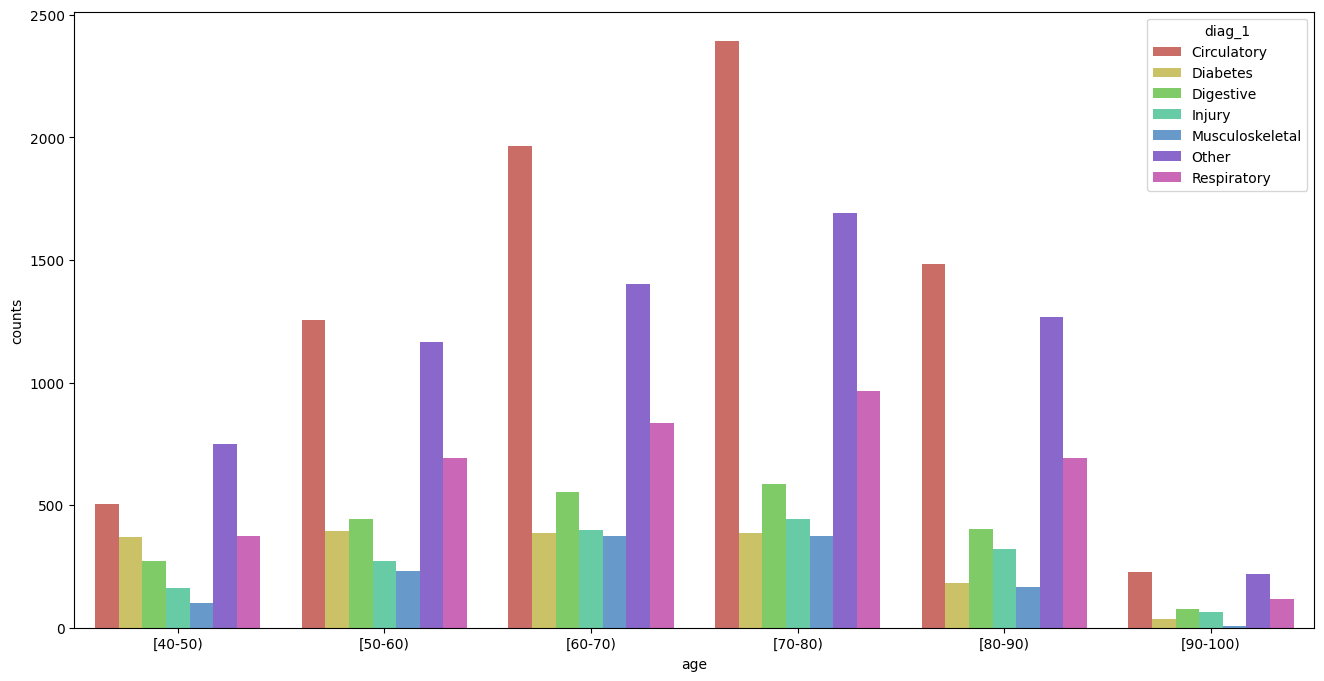

In [35]:
# Group the data by age and primary diagnosis, and count the number of patients in each group
grouped = clean_data.groupby(["age", "diag_1"]).size().reset_index(name='counts')

# Plot the grouped data
plt.figure(figsize=(16, 8))
sns.barplot(x='age', y='counts', hue='diag_1', data=grouped, palette='hls')
plt.show()


 The most common primary diagnoses across all age groups are Circulatory, followed by Other, and Respiratory. The least common primary diagnosis is Musculoskeletal, with the highest count of 373 in the [70-80) age group. The number of counts for Diabetes is the lowest in the [90-100) age group and the highest in the [50-60) age group. The number of counts for Injury decreases as the age group increases, with the highest count in the [60-70) age group and the lowest in the [90-100) age group.

### <ol type='1' start=2><li>Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. </li></ol>


In [36]:
# create a new columns indicating whether the patient has diabetes or not
clean_data['has_diabetes'] = np.where((clean_data['diabetes_med']== "yes") | (clean_data['diag_1']=="Diabetes")| (clean_data['diag_2']=="Diabetes")| (clean_data['diag_3']=="Diabetes"), 1, 0)


In [37]:

# calculate the proportion of readmissions for patients with diabetes and patients without diabetes
readmission_proportion_with_diabetes = clean_data[clean_data['has_diabetes'] == 1]['readmitted'].value_counts(normalize=True)
readmission_proportion_without_diabetes = clean_data[clean_data['has_diabetes'] == 0]['readmitted'].value_counts(normalize=True)

# print the proportions
print("Proportion of readmissions among patients with diabetes:")
print(readmission_proportion_with_diabetes)
print("Proportion of readmissions among patients without diabetes:")
print(readmission_proportion_without_diabetes)

Proportion of readmissions among patients with diabetes:
no     0.518409
yes    0.481591
Name: readmitted, dtype: float64
Proportion of readmissions among patients without diabetes:
no     0.589286
yes    0.410714
Name: readmitted, dtype: float64


Based on the proportions of readmissions among patients with and without diabetes, it can be seen that approximately 51% of patients with diabetes did not get readmitted, while approximately 49% did. On the other hand, approximately 59% of patients without diabetes did not get readmitted, while approximately 41% did.

Comparing the two proportions, it can be concluded that patients with diabetes are slightly more likely to be readmitted (49%) than patients without diabetes (41%). This indicates that having a diabetes diagnosis might have an effect on readmission rates, as suggested by the doctors.

### <ol type='1' start=3><li>On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?</li></ol>


In [38]:
# import the necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [39]:
# take a look at the data
clean_data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,glucose_test,A1Ctest,change,diabetes_med,readmitted,diag_1,diag_2,diag_3,has_diabetes
0,[70-80),8,72,1,18,2,0,0,no,no,no,yes,no,Circulatory,Respiratory,Other,1
1,[70-80),3,34,2,13,0,0,0,no,no,no,yes,no,Other,Other,Other,1
2,[50-60),5,45,0,18,0,0,0,no,no,yes,yes,yes,Circulatory,Circulatory,Circulatory,1
3,[70-80),2,36,0,12,1,0,0,no,no,yes,yes,yes,Circulatory,Other,Diabetes,1
4,[60-70),1,42,0,7,0,0,0,no,no,no,yes,no,Other,Circulatory,Respiratory,1


In [40]:
# map readmitted column to 0 and 1
clean_data['readmitted'] = clean_data['readmitted'].map({'yes': 1, 'no': 0})
clean_data['readmitted'] = clean_data['readmitted'].astype(np.int64)

# create a copy of the data
model_data = clean_data.copy()

# encode the categorical columns
model_data = pd.get_dummies(model_data, drop_first=True)

In [41]:
# split the data into features and target
X = model_data.drop('readmitted', axis=1)
y = model_data['readmitted']

# scale the data in range 0 to 0.5 using standard scaler
from sklearn.preprocessing import MinMaxScaler

# instantiate the scaler 
scaler = MinMaxScaler(feature_range=(0, 0.5) )

# fit the scaler on the data
for col in X.columns:
    X[[col]] = scaler.fit_transform(X[[col]])



# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=3)

In [42]:
# build gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0, n_estimators=500)
gb.fit(X_train, y_train)

# predict on the test set
y_pred = gb.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# print the accuracy score
print("Accuracy of gradient boosting classifier: ", accuracy)

# train score
print("Training score: ", gb.score(X_train, y_train))

Accuracy of gradient boosting classifier:  0.6169333333333333
Training score:  0.6617714285714286


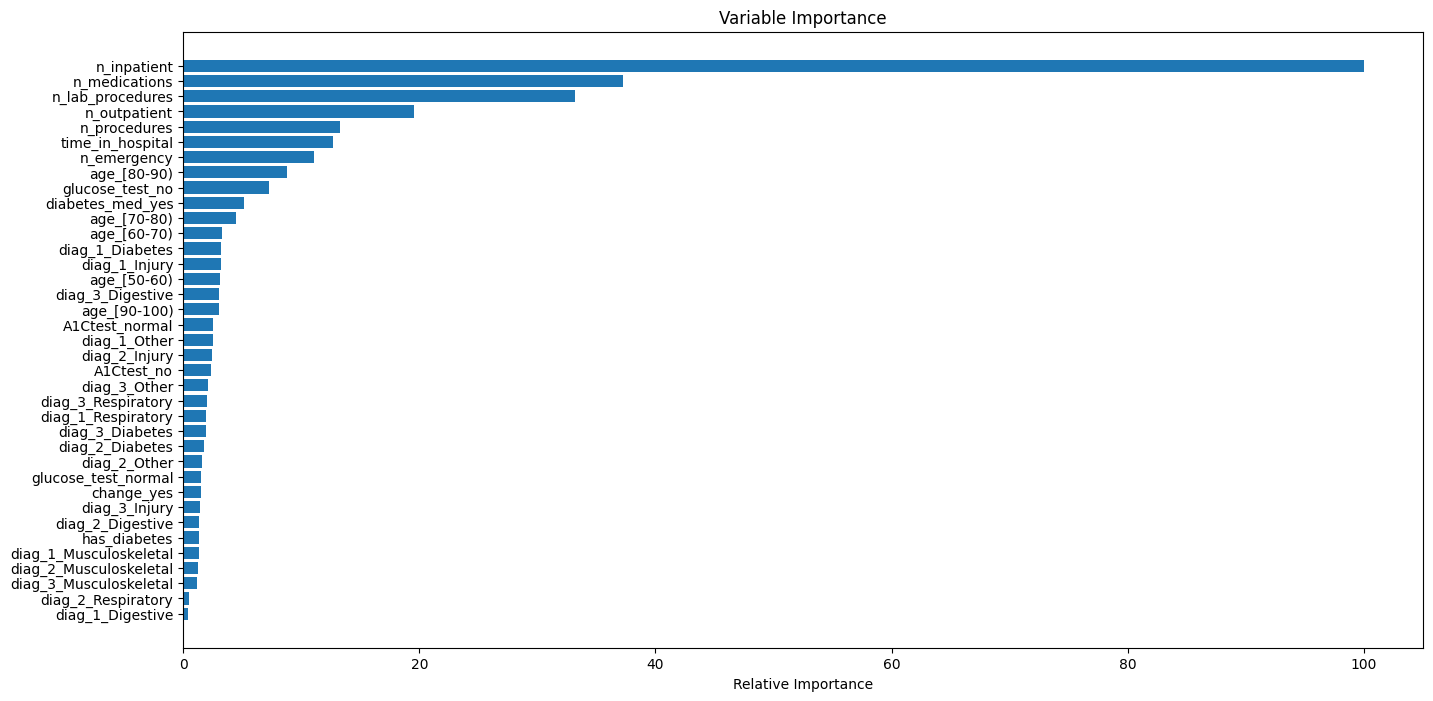

In [43]:
# feature importance from Gradient Boosting Classifier
feature_importance = gb.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

# get the feature names
feature_names = X_train.columns

# plot the feature importance
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(16, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [44]:
# cluster the data by the top 4 features
from sklearn.cluster import KMeans

# select the top 4 features from the dataset
top_4_features_data = X[model_data.columns[sorted_idx][-4:]]

# add readmitted column to the dataset
top_4_features_data['readmitted'] = y

top_4_features_data.head()



,n_outpatient,n_lab_procedures,n_medications,n_inpatient,readmitted
0,0.030303,0.316964,0.108974,0.0,0
1,0.000000,0.147321,0.076923,0.0,0
2,0.000000,0.196429,0.108974,0.0,1
3,0.015152,0.156250,0.070513,0.0,1
4,0.000000,0.183036,0.038462,0.0,0


In [45]:
# build k-means model
kmeans = KMeans(n_clusters=8, random_state=0).fit(top_4_features_data)

# predict the clusters
clusters = kmeans.predict(top_4_features_data)

# add the clusters to the dataset
top_4_features_data['clusters'] = clusters


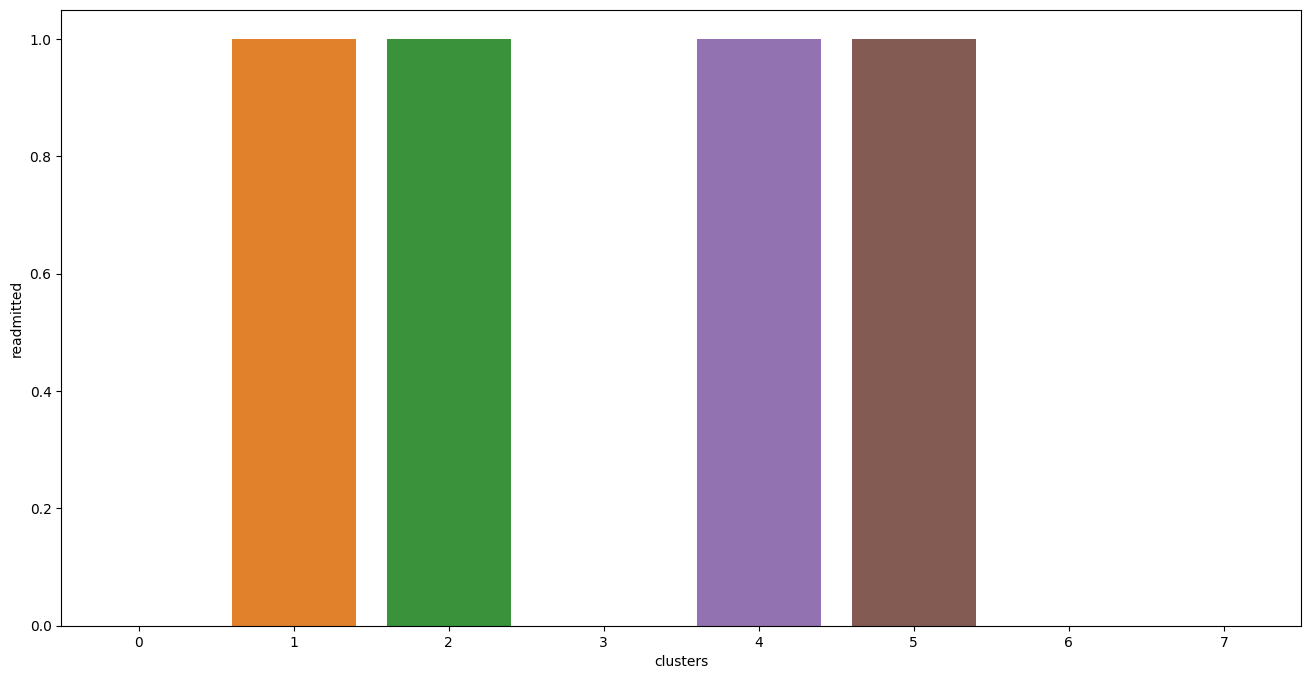

In [46]:
#plot the size for each cluster
plt.figure(figsize=(16, 8))
sns.barplot(x='clusters', y='readmitted', data=top_4_features_data, estimator=np.mean)
plt.show()

In [47]:
# print the size of each cluster and the proportion of readmissions
for i in range(8):
    print("Size of cluster", i, ":", top_4_features_data[top_4_features_data['clusters'] == i].shape[0])
    print("Proportion of readmissions in cluster", i, ":", top_4_features_data[top_4_features_data['clusters'] == i]['readmitted'].mean())
    print()
    

Size of cluster 0 : 3538
Proportion of readmissions in cluster 0 : 0.0

Size of cluster 1 : 3619
Proportion of readmissions in cluster 1 : 1.0

Size of cluster 2 : 2143
Proportion of readmissions in cluster 2 : 1.0

Size of cluster 3 : 2753
Proportion of readmissions in cluster 3 : 0.0

Size of cluster 4 : 936
Proportion of readmissions in cluster 4 : 1.0

Size of cluster 5 : 5056
Proportion of readmissions in cluster 5 : 1.0

Size of cluster 6 : 1375
Proportion of readmissions in cluster 6 : 0.0

Size of cluster 7 : 5580
Proportion of readmissions in cluster 7 : 0.0



In [48]:
# plot the n_inpatient and n_lab_procedures  vs the readmitted column for each cluster using plotly
import plotly.express as px
fig = px.scatter(clean_data, x="n_inpatient", y="n_lab_procedures", color=top_4_features_data['clusters'], size='readmitted', hover_data=['readmitted'])
fig.show()


#### Analyse the clusters of patients with a high probability of readmission

In [49]:
# create a new dataframe with the clusters having high proportion of readmissions
high_readmission_clusters = model_data[top_4_features_data['clusters'].isin([1, 2, 4, 5])]

# get the top 4 features from the high readmission clusters
high_readmission_clusters = high_readmission_clusters[model_data.columns[sorted_idx][-4:]]

# add the readmitted column to the dataset
high_readmission_clusters['readmitted'] = y

# add the clusters to the dataset
high_readmission_clusters['clusters'] = top_4_features_data['clusters']


high_readmission_clusters.head()

,n_outpatient,n_lab_procedures,n_medications,n_inpatient,readmitted,clusters
2,0,45,18,0,1,5
3,1,36,12,0,1,5
5,0,51,10,0,1,5
7,0,19,16,0,1,2
8,0,67,13,0,1,1


In [50]:
# plot the distribution of the top 4 features for each cluster in 3d using plotly
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter3d(
    x=high_readmission_clusters['n_inpatient'],
    y=high_readmission_clusters['n_lab_procedures'],
    z=high_readmission_clusters['n_medications'],
    mode='markers',
    marker=dict(
        size=12,
        color=high_readmission_clusters['clusters'],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])
# names of the axes
fig.update_layout(scene = dict(
                    xaxis_title='n_inpatient',
                    yaxis_title='n_lab_procedures',
                    zaxis_title='n_medications'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

                    
fig.show()



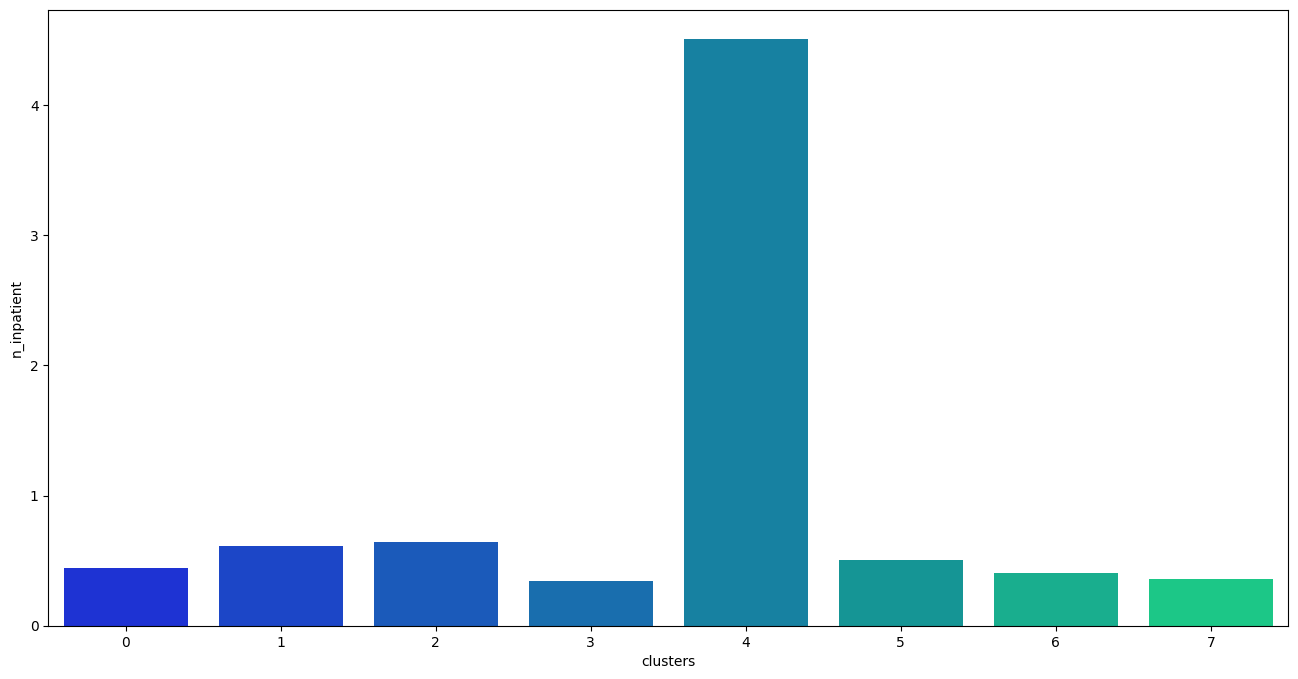

In [77]:
# plot the distribution of the n_inpatient for each cluster
plt.figure(figsize=(16, 8))
sns.barplot(x=top_4_features_data['clusters'], y='n_inpatient', data=model_data, estimator=np.mean, ci=None, palette='winter')
plt.show()


<p>
    Based on the plot, we can see that the patients in clusters 1, 2, 4 and 5 have a hight inpatient visit rate. This means that they are more likely to be readmitted. 
</p>

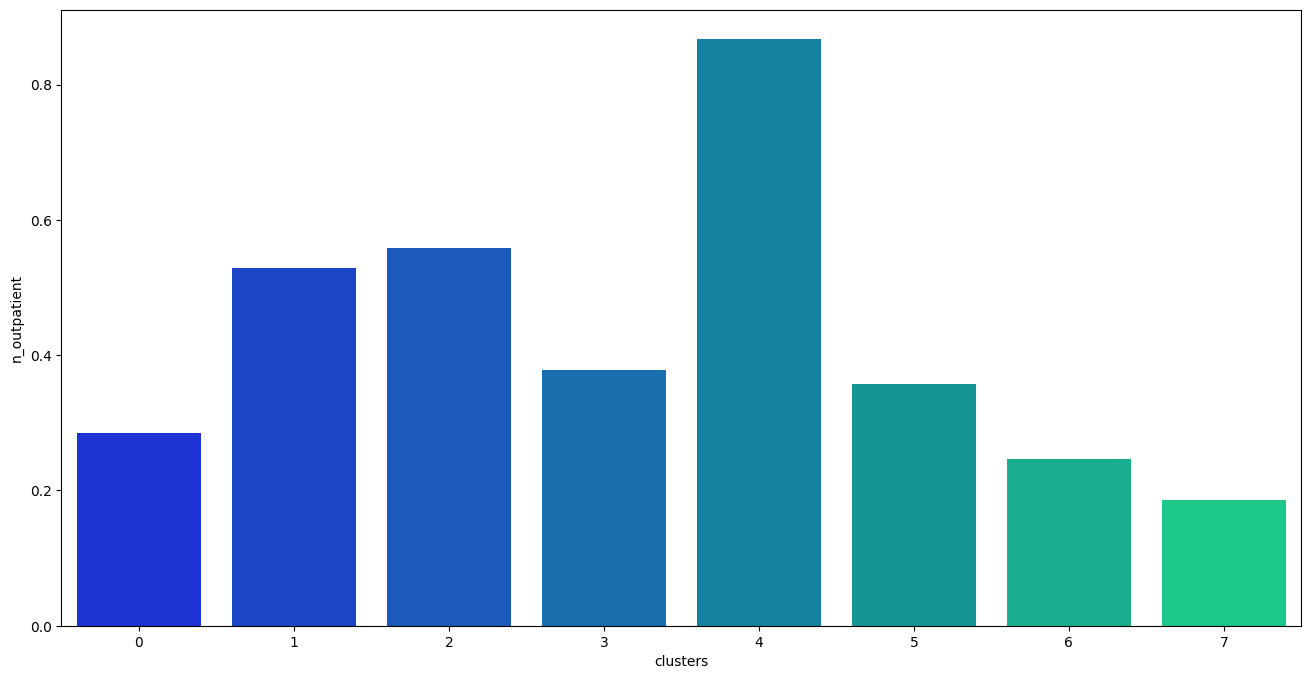

In [76]:
# plot the distribution of n_outpatient for each cluster
plt.figure(figsize=(16, 8))
sns.barplot(x=top_4_features_data['clusters'], y='n_outpatient', data=model_data, estimator=np.mean, ci=None, palette='winter')
plt.show()

<p>
    Based on the plot, we can see that the patients in clusters 1, 2, 4 and 5 have a hight outpatient visit rate.
</p>

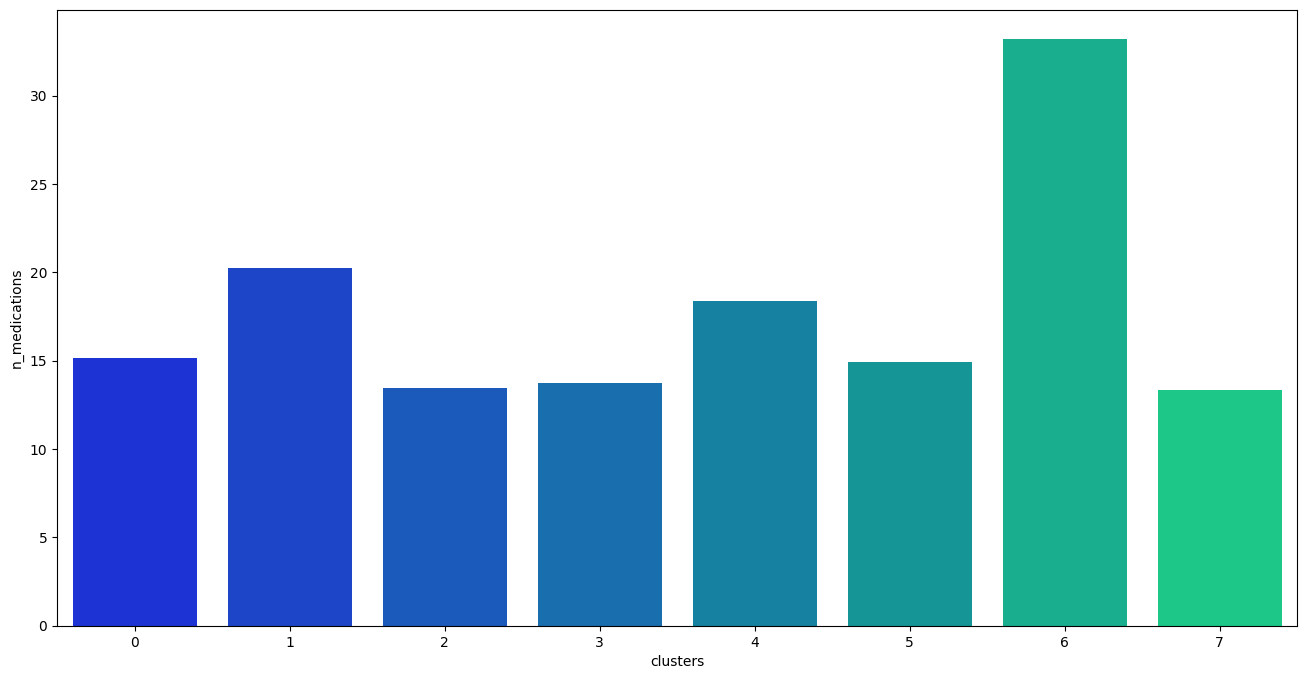

In [75]:
# plot the distribution of n_medications for each cluster
plt.figure(figsize=(16, 8))
sns.barplot(x=top_4_features_data['clusters'], y='n_medications', data=model_data, estimator=np.mean, ci=None, palette='winter')
plt.show()

<p>
    Based on the plot, we can't see any clear pattern between the clusters and the number of emergency visits.
</p>

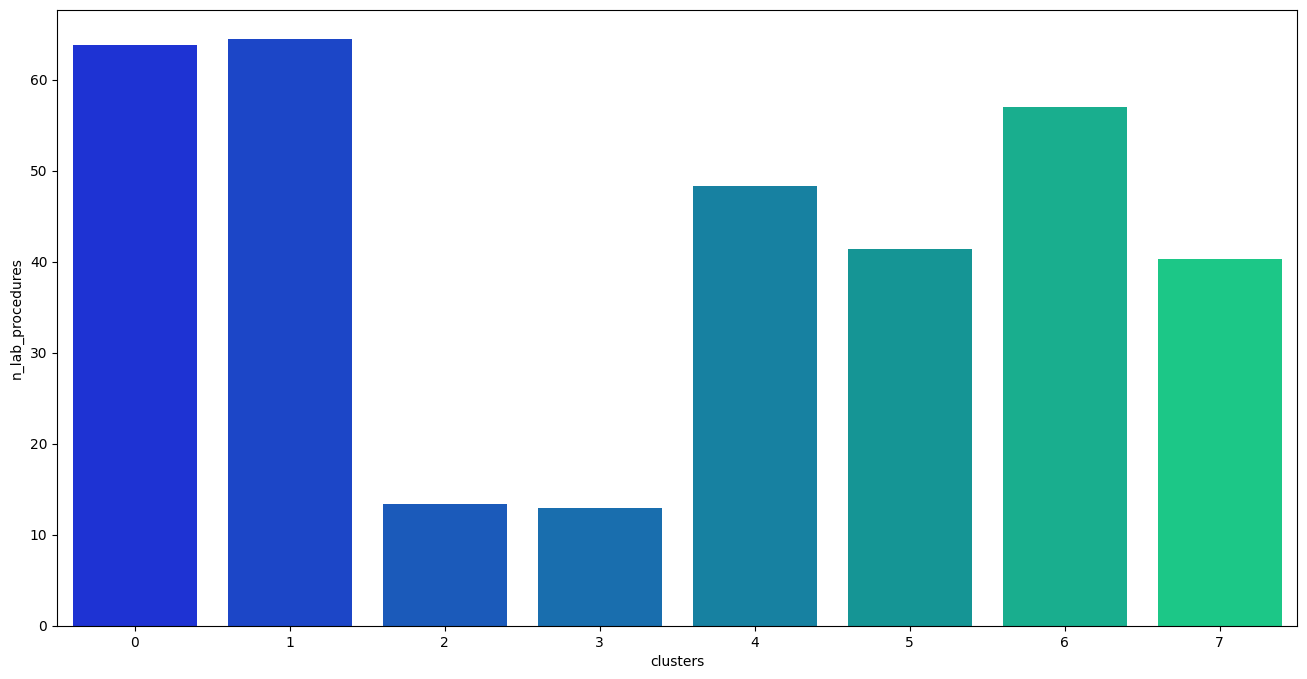

In [74]:
# plot the distribution of n_lab_procedures for each cluster
plt.figure(figsize=(16, 8))
sns.barplot(x=top_4_features_data['clusters'], y='n_lab_procedures', data=model_data, estimator=np.mean, ci=None, palette='winter')
plt.show()

Cluster 5: This group has a relatively low number of outpatient visits and inpatient admissions, with an average of 0.36 outpatient visits and 0.50 inpatient admissions per patient. The average number of lab procedures performed is 41.39 and the average number of medications prescribed is 14.93. This cluster has a relatively low number of lab procedures, medications, and inpatient admissions compared to other clusters.

## 💪 Competition challenge
Create a report that covers the following:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!